# Problem Set 2: Intro to Pandas

## Part 1

In this problem set, we want to determine if we can use voter registrations as a proxy for votes cast. Because who you vote for on an individual basis is not recorded, we would like to see if the numbers for those registered in a precinct as Republican or Democrate actually reflect the results of the election based on the outcome. We'll continue our analysis of Centre County, Pennsylvania, and we are going to use Pandas, Numpy, and Matplotlib as our tools to explore the data.


Building off the in class example, first a short example will introduce us to the dataset, some data wrangling functions of Pandas, and a few plots with Matplotlib.



Throughout the exercises we will be continuously using Pandas and some of its merging functionality to join the numerous OD files available. We will be building exploratory data visualizations, finding urban patterns and locating divergent areas within the dataset. Some useful documentation for merging data with Pandas can be found at:


http://pandas.pydata.org/pandas-docs/stable/merging.html

First, lets install our libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from itertools import cycle, islice

# This line lets us plot on our ipython notebook
%matplotlib inline

Next, let's open up one of the files. Let's look at the voter registrations, this is the same as we did in the inclass.

**Problem 1: Load CENTRE_FVE_20170123.csv into Pandas as a data frame called 'df_voters'.**

In [2]:
df_voters=pd.read_csv('data/CENTRE_FVE_20170123.csv', low_memory=False)

df_voters.head()

,1,2,3,4,5,6,7,8,9,10,...,144,145,146,147,148,149,150,151,152,153
0,002013865-14,NaN,MILLS,JAMES,ARTHUR,NaN,M,2/7/65,10/1/00,A,...,NaN,AB,R,NaN,NaN,NaN,NaN,NaN,CENTRE,NaN
1,002020582-14,NaN,TERRY,CHARLES,D,NaN,U,9/16/76,9/1/02,I,...,NaN,NaN,NaN,NaN,NaN,AP,D,NaN,CENTRE,NaN
2,002287451-14,NaN,MURRELL,RICHARD,L,NaN,M,8/11/50,10/1/72,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CENTRE,NaN
3,002365541-14,NaN,MILLS,JOYCE,ELLEN,NaN,F,5/6/69,10/1/00,A,...,NaN,AP,R,NaN,NaN,NaN,NaN,NaN,CENTRE,NaN
4,002370224-14,NaN,FENTON,CASEY,JAMES,NaN,M,11/22/83,3/1/02,A,...,NaN,AP,D,NaN,NaN,NaN,NaN,5707687675,CENTRE,NaN


To start us off, we need to determine party affiliations for each of those registered. Reading in the metadata, this is held in column 12. Let's take a look at unique party registrations in column 12.

**The data documentation file is located in your data folder. It will describe the fields.**

In [3]:
# View the unique values in column 12
df_voters['12'].unique()

array(['R', 'D', 'NF', 'LN', 'I', 'NON', 'AT', 'GR', 'NO', 'OTH', 'S',
       'TP', 'AE', 'NOP', 'NST', 'SEC', 'UPP', 'GW', 'INDE', 'C', 'CT',
       'DNV', 'AI', 'PR', 'INDd', 'IND', 'ID', 'WH', 'GP', 'PL', 'MW',
       'AM', 'UNA', nan, 'LI', 'IAPP', 'THPY', 'IR', 'UNK', 'NTS', 'DS',
       'SAME', 'IT', 'ICO', 'BM', 'M', 'NS', 'JD', 'LT', 'BH', 'AH', 'MZ',
       'PG', 'PP', 'NL', 'UND', 'N', 'FD', 'IDK', 'RF', 'AYE', 'AD',
       'PPOA', 'MA', 'MM', 'OLAP', 'CNT', 'AF', 'CON', 'GT', 'FR', 'AC',
       'DTP', 'CH', 'SOD', 'IK', 'PZ', 'PIR', 'H', 'FE', 'COL', 'BP', 'CB',
       'AL', 'CM', 'OP', 'IA', 'L', 'TPP', 'ACO', 'COI', 'MAJA', 'KEG'], dtype=object)

There are quite a few, and its pretty messy. Let's to explore MatPlotLib, let's make some charts to see which parties have the highest subscriptions and graph it in a bar chart.

**Group our data so we can plot. Find the number of subscribers to each party and sum them in a table. Call your new data frame 'df_summed', name the columns 'PARTY' and 'NUMBER'**

In [4]:
# Your code here
grouped = df_voters.groupby('12') # Group by party registrations
summed = grouped['12'].count() # Get counts of each group
summed.sort_values(inplace=True, ascending=False)
df_summed = summed.to_frame()
df_summed.columns = ['NUMBER']
df_summed.index.names = ['PARTY']
df_summed

,NUMBER
PARTY,
D,51162
R,47668
NF,17608
NON,2814
I,2006
LN,805
OTH,368
GR,264
INDE,183


Now, let's make a bar chart to do some initial exploration of the data. To get a simple exploratory plot, we use Matplotlib. Matplotlib is integrated into Pandas, and you can create plots from data frames. For more reading, check out the Matplotlib documentation at [Pandas Plotting Documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) and the [Matplotlib Documentation](http://matplotlib.org/2.0.0/contents.html).

Using **df_summed** that you just created, the following will give you a basic bar chart of your dataset.

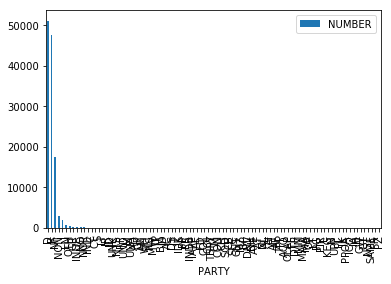

In [5]:
df_summed.plot.bar(legend=True)

This is alot of values! It doesn't make much sense to show them all, let's group categories into three, Republican, Democrat, or Other. We can do this doing some grouping and by implementing what we've learned so far. The following shows you how to find all of the party affiliations that are not 'Democrat' or 'Republican'.

In [6]:
df_summed[(df_summed.index != 'D') & (df_summed.index != 'R')]

,NUMBER
PARTY,
NF,17608
NON,2814
I,2006
LN,805
OTH,368
GR,264
INDE,183
NO,175
NOP,137


Group the parties into Democrat, Republican, and Other. Create a single row table with parties as the rows, and the number of voter registrations as columns. The rows should be Democrat, Republican, and Other. Call the table 'df_parties'

Hint, sum the values you want from **df_summed** for each group and save them as variables. You will then need to create a new numpy array that contains the summed valued for each group and create the new data frame with your answer. This [Stack Exchange Question](http://stackoverflow.com/questions/17839973/construct-pandas-dataframe-from-values-in-variables) will help you, along with the [Pandas documentation on DataFrames](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe).

In [7]:
parties = ['Democrat', 'Republican', 'Other']
values = np.array([df_summed[(df_summed.index == 'D')].NUMBER.item(),df_summed[(df_summed.index == 'R')].NUMBER.item(),df_summed[(df_summed.index != 'D') & (df_summed.index != 'R')].NUMBER.sum()])
df_parties = pd.DataFrame(values,index=parties,columns=list('N'))
df_parties               

,N
Democrat,51162
Republican,47668
Other,24609


**Problem 2: Plot this as a bar chart, using red for Republican, blue for Democrat, and yellow for other.**

You can learn more about bar plots in in the [Bar Plot Documentation](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-barplot). This will also give you hints as to how you can assign colors, along with the other properties affiated with bar charts, such as legends and axes.

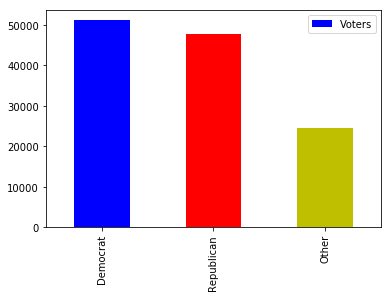

In [8]:
df_parties.columns = ['Voters']
df_parties.plot.bar(color = ['b','r','y'])

**Problem 3: For this next question, implement the above. We want to compare how the number of voter registrations to election results for one precinct (PRECINCT 42). Create a bar chart that has two bars each for category (Democrat, Republican, and Other). One of the bars will represent the number of registered voters to that party, and the second bar representing the count of results (ie how many people actually voted for that parties candidate) for each group**

Hint, you will have to load the precinct level result data into Pandas, then perform the correct grouping and summing to get the numbers you need from both the voter registration data and the precinct level results, then join the two into single dataframe to make your chart. You can base your answers on the following help page: http://chrisalbon.com/python/matplotlib_grouped_bar_plot.html

In [9]:
# Difference between registered voters to the party and results.
# Add your code below:

# Read Election Results data and create a table for Precinct 42
df_elecres = pd.read_table('data/centrecounty_precinct_results_nov2016.txt', sep=',')
df_p42 = df_elecres[df_elecres['PrecNo'] == 42]
df_pres = df_p42.loc[df_p42['Contest'] == 'PRESIDENTIAL ELECTORS']
votes_raw = np.array(df_pres.Count)
parties_raw = df_pres.Party
df_vote_raw = pd.DataFrame(votes_raw, index=parties_raw, columns=['Votes'])
votes = np.array([df_vote_raw[(df_vote_raw.index == 'DEMOCRATIC')].Votes.item(), df_vote_raw[(df_vote_raw.index == 'REPUBLICAN')].Votes.item(), df_vote_raw[(df_vote_raw.index != 'DEMOCRATIC')& (df_vote_raw.index != 'REPUBLICAN')].Votes.sum()])
parties = ['Democrat','Republican','Other']
df_votecnt = pd.DataFrame(votes, index=parties, columns=['Votes'])
df_votecnt

,Votes
Democrat,802.0
Republican,736.0
Other,81.0


In [10]:
# Read Voter Registration data and create a table for Precinct 42
df_voters=pd.read_csv('data/CENTRE_FVE_20170123.csv', low_memory=False)
df_p42 = df_voters[df_voters['27'] == 42]
grouped = df_p42.groupby('12') 
summed = grouped['12'].count()
df_regvote = summed.to_frame()
df_regvote.columns = ['Reg_Voters']
df_regvote.index.names = ['PARTY']
df_regvote
parties = ['Democrat','Republican','Other']
voters = np.array([df_regvote[(df_regvote.index == 'D')].Reg_Voters.item(), df_regvote[(df_regvote.index == 'R')].Reg_Voters.item(), df_regvote[(df_regvote.index != 'D')& (df_regvote.index != 'R')].Reg_Voters.sum()])
df_voters = pd.DataFrame(voters, index=parties, columns=['Reg_Voters'])
df_voters

,Reg_Voters
Democrat,824
Republican,978
Other,314


In [11]:
# Join the two tables
df_joined = df_voters.join(df_votecnt)
df_joined


,Reg_Voters,Votes
Democrat,824,802.0
Republican,978,736.0
Other,314,81.0


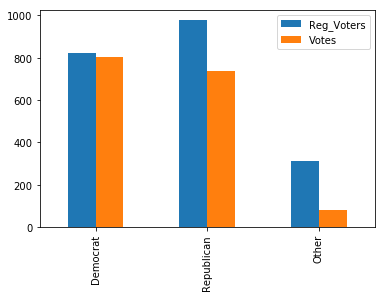

In [12]:
# Plot the dataset
df_joined.plot.bar()



## Part 2 - Scatterplotting

Now we will use the **precinct_centroids** file provided to display the geographical location of the centroid of each precinct, plot them in a scatterplot, then size the points in the scatterplot according to the number of votes.

First, load the CSV.

In [13]:
df_precinct_locations = pd.read_table('data/center_county_precinct_centroids.csv', sep=',', low_memory=False)
df_precinct_locations.head()

,X,Y,OBJECTID,NAME,Precinct,GlobalID,MDJ,ShapeSTAre,ShapeSTLen
0,-77.972391,41.129340,1,BURNSIDE,40,{A309C3DE-8AD8-46A5-B8EA-B8F7E1ADB972},49-3-03,2.530029e+09,280069.560289
1,-77.641414,41.068505,2,LIBERTY,60,{57577111-D7B7-4048-9517-EF2ED6059928},49-3-02,6.878831e+08,131265.443714
2,-77.688090,41.010310,3,HOWARD TWP,58,{C9B8B5CF-6699-485A-97D2-74FB9B2D6FFE},49-3-02,5.275320e+08,111072.612891
3,-77.642348,40.985981,4,MARION,61,{FA3740D2-624B-4464-B6CD-16F6E219ADEA},49-3-02,6.135493e+08,131038.017743
4,-77.949892,41.027568,5,SNOW SHOE,14,{908F092A-BCFF-4EA5-99D7-B9248A2EA56A},49-3-03,1.644442e+07,19920.287608


Now that we have a new `DataFrame` for each precinct and the geographical location of its centroid, we can use lat/lon values to create a scatter plot. We can even vary their size based on the variables or criteria we set. If variation across precincts is not that big, we can use a log function to better visualize it on our plot. Numpy has a quick log implementation:
```Python
np.log(value)
```
In this following example, we give the points a simple size of 25.

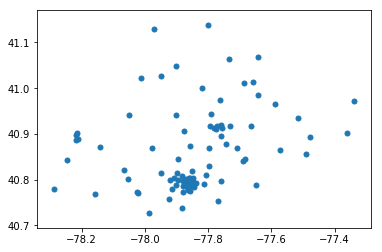

In [14]:
plt.scatter(df_precinct_locations['X'],df_precinct_locations['Y'], s=25)
plt.show()

**Problem 4: Using the above example, and the documentation on scatterplots, create two scatterplots using longitude and latitude X and Y locations, one showing percentage of vote for Trump, and other percentage of vote for Clinton. Make the Trump dots colored red, and Clinton blue.**

Find the [Scatterplot documentation here](http://pandas.pydata.org/pandas-docs/version/0.19.1/visualization.html#scatter-plot)

Hint: You will need to join the results precincts file to the centroids, and then set the size of the plot points to be the percentages. This is accessed using the S property.

To perform the join, use merge. This [Stack Exchange](http://stackoverflow.com/questions/20375561/joining-pandas-dataframes-by-column-names) question will help!

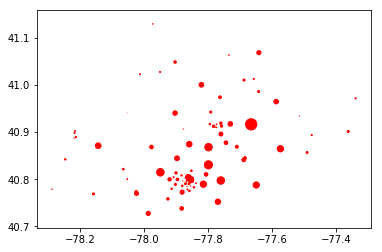

In [15]:
# Map 1: Votes for Trump
# Add your code below:
df_res = pd.read_table('data/centrecounty_precinct_results_nov2016.txt', sep=',')
df_res = df_res[df_res['Candidate'].notnull()]
df_trump = df_res.loc[df_res['Candidate'].str.contains('TRUMP')]
df_trump_sm = df_trump[['PrecNo','Count']]
df_trump_sm                       

df_precinct_locs = pd.read_table('data/center_county_precinct_centroids.csv', sep=',', low_memory=False)
df_trump_locs = df_precinct_locs.set_index('Precinct').join(df_trump_sm.set_index('PrecNo'))
df_trump_locs

plt.scatter(df_precinct_locs['X'],df_precinct_locs['Y'], color='red', s=(df_trump_locs['Count']*df_trump_locs['Count']*df_trump_locs['Count']/10000000))
plt.show()


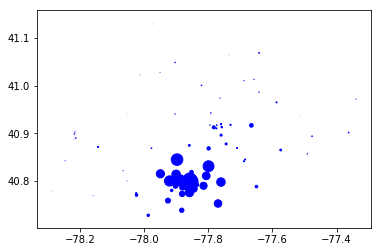

In [16]:
# Map 2: Votes for Clinton
# Add your code below:

df_res = pd.read_table('data/centrecounty_precinct_results_nov2016.txt', sep=',')
df_res = df_res[df_res['Candidate'].notnull()]
df_clinton = df_res.loc[df_res['Candidate'].str.contains('CLINTON')]
df_clinton_sm = df_clinton[['PrecNo','Count']]
df_clinton                       

df_precinct_locs = pd.read_table('data/center_county_precinct_centroids.csv', sep=',', low_memory=False)
df_clinton_locs = df_precinct_locs.set_index('Precinct').join(df_clinton_sm.set_index('PrecNo'))
df_clinton_locs

plt.scatter(df_precinct_locs['X'],df_precinct_locs['Y'], color='blue', s=(df_clinton_locs['Count']*df_clinton_locs['Count']*df_clinton_locs['Count']/10000000))
plt.show()


## Graphic Presentation

Make sure to label all the axis, add legends and units (where appropriate).


## Code Quality

While code performance and optimization won't count, all the code should be highly readable, and reusable. Where possible, create functions, build helper functions where needed, and make sure the code is self-explanatory.

In [17]:
print ("Wasn't that fun?")

Wasn't that fun?
